<a href="https://colab.research.google.com/github/iskander-r/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [4]:
# TODO - code!

# EDA and data handling
import numpy as np
import pandas as pd

#p_of_drunk_given_positive = (p_of_positive_given_drunk * P_of_drunk)/(p_of_positive)
#p_positive = p_positive_given_drunk * p_of_drunk + p_positive_given_not_drunk*p_of_not_drunk
#p_positive_given_drunk = 1
#p_of_drunk=1/1000
#p_positive_given_not_drunk=0.08
#p_of_not_drunk = 1 - p_of_drunk


def drunk_helper(p_of_drunk, p_positive_given_drunk, p_positive_given_not_drunk):
  numerator = p_positive_given_drunk * p_of_drunk
  denominator = p_positive_given_drunk * p_of_drunk + p_positive_given_not_drunk*(1 - p_of_drunk)
  result = numerator/denominator
  return result





0.012357884330202669

In [5]:
#What is the probability that a person is drunk after one positive breathalyzer test?
drunk_helper(1/1000,1,0.08)

0.012357884330202669

In [7]:
#What is the probability that a person is drunk after two positive breathalyzer tests?
drunk_helper(0.012357884330202669,1,0.08)

0.13525210993291495

In [9]:
drunk_helper(0.13525210993291495,1,0.08)

0.6615996951348605

In [10]:
drunk_helper(0.6615996951348605,1,0.08)

0.9606895076105054

In [12]:
#How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?
def how_many_until_proven_drunk(p_of_drunk, p_positive_given_drunk, p_positive_given_not_drunk, conf_level):
  temp = drunk_helper(p_of_drunk, p_positive_given_drunk, p_positive_given_not_drunk)
  count=1
  while temp < conf_level:
    temp = drunk_helper(temp, p_positive_given_drunk, p_positive_given_not_drunk)
    count = count+1
  return count
  
how_many_until_proven_drunk(1/1000,1,0.08, 0.95)

4

In [0]:
#Confidence Interval assignment
#Frequentist confidence interval
def conf_int(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    mydata = np.array(data) 
    mymean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    margin = stderr*stats.t.ppf((1 + confidence)/ 2, n-1)
    return (mymean, mymean - margin, mymean + margin)

In [0]:
from scipy import stats

In [18]:
coinflips = np.random.binomial(1, .5, 2000)
coinflips

array([0, 0, 0, ..., 0, 0, 1])

In [19]:
conf_int(coinflips)

(0.5055, 0.48356950382576586, 0.527430496174234)

In [0]:
#bayes
mean_CI, _, _ = stats.bayes_mvs(coinflips)

In [22]:
mean_CI

Mean(statistic=0.5055, minmax=(0.48711109001552333, 0.5238889099844766))

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


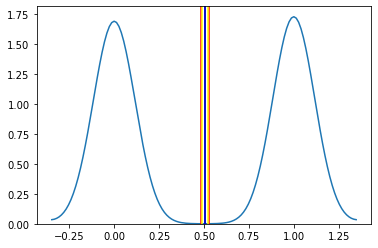

In [28]:
sns.kdeplot(coinflips)
CI = conf_int(coinflips)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
CI1 = mean_CI
plt.axvline(x=CI1[1][0], color='yellow')
plt.axvline(x=CI1[1][1], color='yellow')
plt.axvline(x=CI1[0], color='blue');

In [0]:
#In your own words, summarize the difference between Bayesian and Frequentist statistics

While Frequentist statistics relies heavily on the quality and size of its sample, Bayesian statistics updates it's 'prior' component with new information as it encounters it to improve its quality of predictions
 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!